# Machine Learning Lab 3 :-  Prediction of Numeric Values
<hr/>

**Submitted by:-** <br>

Name: **Naveen N S** <br>
Register Number: **20112045** <br>
Class: **4BSCDS** <br> 
<hr/>

# Lab Overview
---------------------------------

- Using Pandas to Import the Dataset
- Doing the necessary Exploratory Data Analysis
- Using the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
- Showing the Regression Score, Intercept and other parameters etc in the Output
- Using visualizations and plots wherever necessary

## 1] What are your observations on the Dataset?
--------------------------------------

## Problem Approach
-----------------------------------
- Importing required libraries
- Using read_csv to load dataset 
- Doing EDA on the given dataset


In [59]:
# importing requried libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
# to ignore warnings

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [61]:
#loading dataset

df = pd.read_csv("HousePricesLab3.csv")
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


In [4]:
# getting information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BuildingType  1000 non-null   object 
 1   Location      1000 non-null   object 
 2   Size          1000 non-null   object 
 3   AreaSqFt      1000 non-null   float64
 4   NoOfBath      1000 non-null   int64  
 5   NoOfPeople    1000 non-null   int64  
 6   NoOfBalcony   1000 non-null   int64  
 7   RentPerMonth  1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [5]:
# getting summary of the numerical features

df.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [6]:
# checking for null values

df.isnull( ).sum( )

BuildingType    0
Location        0
Size            0
AreaSqFt        0
NoOfBath        0
NoOfPeople      0
NoOfBalcony     0
RentPerMonth    0
dtype: int64

In [7]:
# counting unique values

df.nunique()

BuildingType     10
Location         11
Size             10
AreaSqFt        495
NoOfBath         10
NoOfPeople        6
NoOfBalcony       4
RentPerMonth    387
dtype: int64

In [8]:
# coulumns of the datasets

print("COLUMNS: ")
print()

for i in range(len(df.columns)):
    print(df.columns[i])

COLUMNS: 

BuildingType
Location
Size
AreaSqFt
NoOfBath
NoOfPeople
NoOfBalcony
RentPerMonth


In [9]:
# correlation between columns

df.corr()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
AreaSqFt,1.000000,0.375791,0.374907,0.206123,0.473022
NoOfBath,0.375791,1.000000,0.480063,0.258885,0.579693
NoOfPeople,0.374907,0.480063,1.000000,0.184932,0.782853
NoOfBalcony,0.206123,0.258885,0.184932,1.000000,0.193619
RentPerMonth,0.473022,0.579693,0.782853,0.193619,1.000000


In [10]:
# grouping upon size of house and location 

df.groupby(["Size","Location"]).count()

BuildingType  AreaSqFt  NoOfBath  NoOfPeople  \
Size  Location                                                      
1 BHK Clubview Road            10        10        10          10   
      Portofino A              10        10        10          10   
      Portofino B               4         4         4           4   
      Portofino C               3         3         3           3   
      Portofino D               3         3         3           3   
...                           ...       ...       ...         ...   
8 BHK School Street             3         3         3           3   
9 BHK Portofino B               1         1         1           1   
      Portofino C               1         1         1           1   
      Portofino F               1         1         1           1   
      Portofino H               1         1         1           1   

                     NoOfBalcony  RentPerMonth  
Size  Location                                  
1 BHK Clubview Road           10            10  
      Portofino A             10            10  
      Portofino B              4             4  
      Portofino C              3             3  
      Portofino D              3             3  
...                          ...           ...  
8 BHK School Street            3             3  
9 BHK Portofino B              1             1  
      Portofino C              1             1  
      Portofino F              1             1  
      Portofino H              1             1  

[69 rows x 6 columns]

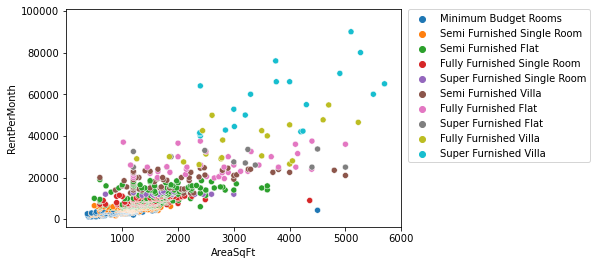

In [11]:
# Scatterplot

ax = sns.scatterplot(x= df['AreaSqFt'],y= df['RentPerMonth'],hue= df['BuildingType']);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
ax.set_xlim(1,6000);

----------------------------
From this scatterplot, we see that most of the data points are concentrated betweeen the range of 3000 sqft in case of Area SqFt and rent in the range of 40 thousand.

------------------------------

C:\Users\avgee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


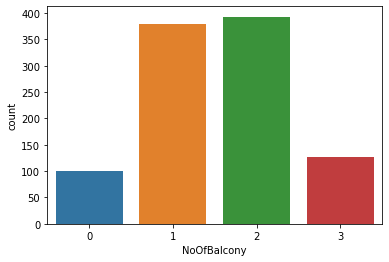

In [12]:
sns.countplot(df['NoOfBalcony']);

---------------------------
This countplot tells us that most number of houses(approx 400) have 2 balconies and there are 100 houses having no balcony.
Around 150 houses have 3 balconies.

----------------------------------------------------------

C:\Users\avgee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


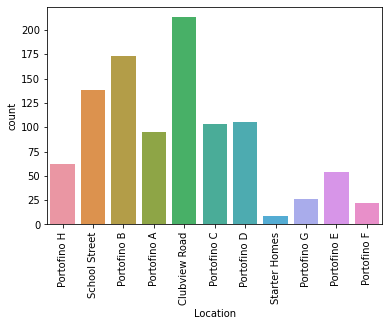

In [13]:
plt.xticks(rotation=90)
sns.countplot(df['Location']);

---------------------------
From this plot, we can infer that most number of houses(around 225) are present in Clubview Road and least homes are there in Starter Homes

----------------------------

In [75]:
Pie = df['BuildingType'].value_counts().reset_index()
Pie.columns = ['BuildingType','Percent']
Pie['Percent'] /= len(df)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(Pie, names = 'BuildingType', values = 'Percent', title = 'Type of Building', color = "Percent")
fig.update_traces( textfont_size=20,marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

-----------------------
From this piechart, we can clearly see that 27.4 % of the houses are Semi Furnished Single Room and super furnished houses are least i.e 1.2 %

------------------------------

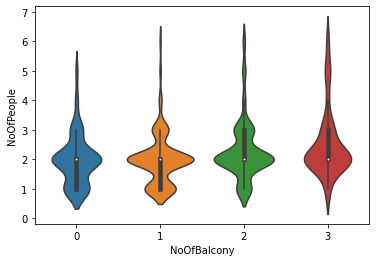

In [15]:
# checking the distribution of balcony per person living in the house

sns.violinplot(x= df['NoOfBalcony'],y=df['NoOfPeople']);

------------------
This violinplot tells us about spread of people living in the house based upon the number of balconies present. We see that,mostly two people are living irrespective of the number of balconies.

-----------------

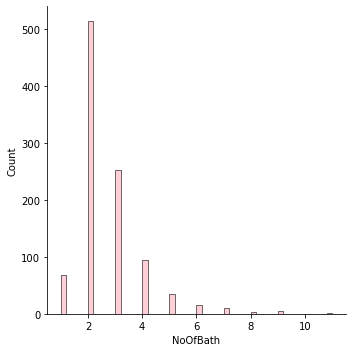

In [16]:
# getting the count of houses having different number of bathrooms in itbb

sns.displot(df['NoOfBath'],color = "pink");

------------------------
This displot tells us the count of houses based on number of bathrooms it has in it. Here, almost 510 houses have 2 bathrooms whereas there are few houses having even 6,8,11 number of bathrooms.

----------------------------------

## PERFORMING LINEAR REGRESSION
---------------------------------------------------

## Problem Approach
----------------------------------
- Identifying dependent and independent variables
- Splitting dataset into test and train data using sklearn's command

In [17]:
import sklearn.model_selection as sk
from sklearn import preprocessing

In [18]:
# showing dependent and independent variables

dependent='RentPerMonth'
independent=df.columns.tolist()
independent.remove(dependent)

x=df[dependent].values
y=df[independent].values

print("*"*50)
print(" INDEPENDENT VARIABLES".center(50))
print("*"*50)
print(independent)


print()

print("*"*50)
print("DEPENDENT VARIABLES".center(50))
print("*"*50)
print(dependent)

**************************************************
               INDEPENDENT VARIABLES              
**************************************************
['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath', 'NoOfPeople', 'NoOfBalcony']

**************************************************
               DEPENDENT VARIABLES                
**************************************************
RentPerMonth


In [19]:
# Observed value of housing prices
dependent = df["RentPerMonth"]

# Created the new dataset. This dataset contains the independent features.
new_df = df.drop("RentPerMonth",axis=1)

In [28]:
# converting categorical features to numerical using LabelEncoder() command

lab_encoder = preprocessing.LabelEncoder()

new_df['BuildingType']= lab_encoder.fit_transform(df['BuildingType'])
new_df['Location']= lab_encoder.fit_transform(df['Location'])
new_df['Size']= lab_encoder.fit_transform(df['Size'])
new_df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony
0,3,8,0,400.0,1,1,1
1,3,8,0,450.0,1,1,1
2,3,9,0,530.0,1,1,0
3,3,2,0,400.0,1,1,0
4,3,9,2,460.0,1,1,0


**Calculating the loss function for the ratio is 50:50**

In [29]:
# splitting dataset into training and testing set using sklearn's train_test_split() command

x_train, x_test, y_train, y_test = sk.train_test_split(new_df, dependent, test_size=0.50)


print("*"*50)
print(" Y TRAINING DATASET".center(50))
print("*"*50)
print()
print(y_train)

print()

print("*"*50)
print(" Y TESTING DATASET".center(50))
print("*"*50)
print()
print(y_test)

print("*"*50)
print(" X TRAINING DATASET".center(50))
print("*"*50)
print()
print(x_train)
print()

print("*"*50)
print(" X TESTING DATASET".center(50))
print("*"*50)
print()
print(x_test)

**************************************************
                Y TRAINING DATASET                
**************************************************

427     6200.0
484     6829.0
891    20400.0
992    65000.0
704    10000.0
        ...   
866    18000.0
790    13000.0
509     7000.0
281     5049.0
101     3668.0
Name: RentPerMonth, Length: 500, dtype: float64

**************************************************
                 Y TESTING DATASET                
**************************************************

126     4000.0
187     4500.0
625     8904.0
788    13000.0
207     4579.0
        ...   
583     8090.0
919    24000.0
540     7500.0
78      3332.0
105     3700.0
Name: RentPerMonth, Length: 500, dtype: float64
**************************************************
                X TRAINING DATASET                
**************************************************

     BuildingType  Location  Size  AreaSqFt  NoOfBath  NoOfPeople  NoOfBalcony
427             5         3     

In [30]:
print("Shape of x_train:: ",x_train.shape,"\n")
print("Shape of x_test:: ",x_test.shape,"\n")
print("Shape of y_train:: ",y_train.shape,"\n")
print("Shape of y_test:: ",y_test.shape,"\n")

Shape of x_train::  (500, 7) 

Shape of x_test::  (500, 7) 

Shape of y_train::  (500,) 

Shape of y_test::  (500,) 



In [23]:
# libraries to perform linear regression and to calculate the evaluation metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)
pred_y = lin_reg.predict(x_test)
score=r2_score(y_test,pred_y)

In [32]:
prd_df = pd.DataFrame({'Actual price': y_test, 'Predicted price':pred_y})
prd_df

,Actual price,Predicted price
126,4000.0,176.014122
187,4500.0,1379.636958
625,8904.0,14818.233509
788,13000.0,14187.773420
207,4579.0,1720.818895
...,...,...
583,8090.0,4678.606720
919,24000.0,25451.197020
540,7500.0,10553.043146
78,3332.0,3416.564156


In [33]:
print("*"*50)
print("REGRESSION SCORE".center(50))
print("*"*50)
print(score)

print()

print("*"*50)
print("INTERCEPT".center(50))
print("*"*50)
print(lin_reg.intercept_)

print()

print("*"*50)
print("REGRESSION COEFFICIENT".center(50))
print("*"*50)
print()
print(lin_reg.coef_)

**************************************************
                 REGRESSION SCORE                 
**************************************************
0.6737548843756468

**************************************************
                    INTERCEPT                     
**************************************************
-14920.441367873163

**************************************************
              REGRESSION COEFFICIENT              
**************************************************

[ 8.70966603e+02 -9.42411265e+01 -4.16825815e+01  8.91290876e-01
  2.35071479e+03  6.91155040e+03 -3.76166854e+01]


## 2] What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
---------------------------------

## Problem Approach 
-------------------------

- Importing metrics from sklearn library
- Caculating MAE, MSE, RMSE

In [34]:
from sklearn import metrics

In [35]:
print("***************************** EVALUATION METRICES *****************************")
print()

print("*"*50)
print("MEAN ABSOLUTE ERROR (MAE)".center(50))
print("*"*50)
print(metrics.mean_absolute_error(y_test,pred_y))

print()

print("*"*50)
print("MEAN SQUARED ERROR (MSE)".center(50))
print("*"*50)
print(metrics.mean_squared_error(y_test,pred_y))

print()

print("*"*50)
print("ROOT MEAN ABSOLUTE ERROR (RMSE)".center(50))
print("*"*50)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y)))

***************************** EVALUATION METRICES *****************************

**************************************************
            MEAN ABSOLUTE ERROR (MAE)             
**************************************************
3947.665993985853

**************************************************
             MEAN SQUARED ERROR (MSE)             
**************************************************
28265076.762835976

**************************************************
         ROOT MEAN ABSOLUTE ERROR (RMSE)          
**************************************************
5316.4910197268255


## 3] Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
------------------------------

## Problem Approach
----------------------------------
- Doing Linear Regression using various split ratios

**Calculating the loss function for the ratio is 60:40**

In [39]:
x_train, x_test, y_train, y_test = sk.train_test_split(new_df, dependent, test_size=0.40)

print("Shape of x_train: ",x_train.shape,"\n")
print("Shape of x_test: ",x_test.shape,"\n")
print("Shape of y_train: ",y_train.shape,"\n")
print("Shape of y_test: ",y_test.shape,"\n")

Shape of x_train::  (600, 7) 

Shape of x_test::  (400, 7) 

Shape of y_train::  (600,) 

Shape of y_test::  (400,) 



In [42]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)
pred_y = lin_reg.predict(x_test)
score=r2_score(y_test,pred_y)

print("*"*50)
print("REGRESSION SCORE WHEN SPLIT IS 60:40".center(50))
print("*"*50)
print(score)

**************************************************
       REGRESSION SCORE WHEN SPLIT IS 60:40       
**************************************************
0.712208372995868


In [43]:
price_df = pd.DataFrame({'Actual price': y_test, 'Predicted price':pred_y})
price_df

,Actual price,Predicted price
36,2588.0,220.856736
204,4500.0,1585.264862
920,24000.0,21001.764237
593,8300.0,7934.030975
605,8500.0,8148.371540
...,...,...
47,2725.0,-1342.273468
975,42000.0,46222.437334
565,7900.0,6303.559919
267,5000.0,8100.650302


**Calculating the loss function for the ratio is 70:30**

In [44]:
x_train, x_test, y_train, y_test = sk.train_test_split(new_df, dependent, test_size=0.30)

print("Shape of x_train: ",x_train.shape,"\n")
print("Shape of x_test: ",x_test.shape,"\n")
print("Shape of y_train: ",y_train.shape,"\n")
print("Shape of y_test: ",y_test.shape,"\n")

Shape of x_train:  (700, 7) 

Shape of x_test:  (300, 7) 

Shape of y_train:  (700,) 

Shape of y_test:  (300,) 



In [45]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)
pred_y = lin_reg.predict(x_test)
score=r2_score(y_test,pred_y)

print("*"*50)
print("REGRESSION SCORE WHEN SPLIT IS 70:30".center(50))
print("*"*50)
print(score)

**************************************************
       REGRESSION SCORE WHEN SPLIT IS 70:30       
**************************************************
0.6668015265300906


In [46]:
price_df = pd.DataFrame({'Actual price': y_test, 'Predicted price':pred_y})
price_df

,Actual price,Predicted price
645,9145.0,10817.745485
859,16500.0,17909.298667
477,6700.0,8210.396168
637,9000.0,18228.626681
79,3400.0,855.384151
...,...,...
506,7000.0,11743.748206
333,5500.0,8902.897212
922,24500.0,28946.197262
806,14000.0,15822.862469


**Calculating the loss function for the ratio is 80:20¶**

In [47]:
x_train, x_test, y_train, y_test = sk.train_test_split(new_df, dependent, test_size=0.20)

print("Shape of x_train: ",x_train.shape,"\n")
print("Shape of x_test: ",x_test.shape,"\n")
print("Shape of y_train: ",y_train.shape,"\n")
print("Shape of y_test: ",y_test.shape,"\n")

Shape of x_train:  (800, 7) 

Shape of x_test:  (200, 7) 

Shape of y_train:  (800,) 

Shape of y_test:  (200,) 



In [50]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)
pred_y = lin_reg.predict(x_test)
score=r2_score(y_test,pred_y)

print("*"*50)
print("REGRESSION SCORE WHEN SPLIT IS 80:20".center(50))
print("*"*50)
print(score)

**************************************************
       REGRESSION SCORE WHEN SPLIT IS 80:20       
**************************************************
0.6531710217657285


In [49]:
price_df = pd.DataFrame({'Actual price': y_test, 'Predicted price':pred_y})
price_df

,Actual price,Predicted price
770,12500.0,10671.625306
208,4580.0,1645.235131
946,28000.0,24015.203003
497,7000.0,5236.094838
997,80000.0,36245.503895
...,...,...
857,16500.0,14586.315292
593,8300.0,7647.882012
912,23000.0,23436.533192
879,19400.0,10819.125134


## Inference:
----------------------
Here, we see that we are getting good r2_score when the split ratio 80:20


## 4] During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?
------------------------------------------------------

### CASES:

**1] BHK with 2 Bathrooms in Portofino Street**

In [53]:
price_data = pd.DataFrame()
price_data['BuildingType'] = [1]
price_data['Location'] = [8]
price_data['Size'] = [1]
price_data['AreaSqFt'] = [2]
price_data['NoOfBath'] = [3]
price_data['NoOfPeople'] = [5]
price_data['NoOfBalcony'] = [5]
y_pred = lin_reg.predict(price_data)
price_data['Price'] = y_pred

price_data

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,Price
0,1,8,1,2,3,5,5,27174.44944


-------------------
Thus, the prediction says that houses with 2 bathrooms have rent of Rupees 27174 /-

---------------

**2] Fully Furnished 2 BHK in School Street**

In [55]:
price_data = pd.DataFrame()
price_data['BuildingType'] = [9]
price_data['Location'] = [2]
price_data['Size'] = [2]
price_data['AreaSqFt'] = [2]
price_data['NoOfBath'] = [3]
price_data['NoOfPeople'] = [5]
price_data['NoOfBalcony'] = [5]
y_pred = lin_reg.predict(price_data)
price_data['Price'] = y_pred

price_data

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,Price
0,9,2,2,2,3,5,5,31270.686909


---------------------
Thus, the prediction says that  Fully Furnished 2 BHK in School Street have rent of Rupees 31270 /-

-----------------------

**3] Single Room anywhere in Lavasa**

In [57]:
price_data = pd.DataFrame()
price_data['BuildingType'] = [3]
price_data['Location'] = [2]
price_data['Size'] = [3]
price_data['AreaSqFt'] = [2]
price_data['NoOfBath'] = [3]
price_data['NoOfPeople'] = [5]
price_data['NoOfBalcony'] = [5]
y_pred = lin_reg.predict(price_data)
price_data['Price'] = y_pred

price_data

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,Price
0,3,2,3,2,3,5,5,27400.436054


---------------------
Thus, the prediction says that Single Room anywhere in Lavasa have rent of  around Rupees 27400 /-

-----------------------

## References
----------------------------------------
- https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/
- https://www.dataquest.io/blog/understanding-regression-error-metrics/
- https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
- https://stackoverflow.com/questions/59740434/how-to-print-intercept-and-slope-of-a-simple-linear-regression-in-python-with-sc
- https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/
- https://plotly.com/python/pie-charts/

## Conclusion 
----------------------------------
- In this lab, I learnt how to do EDA on the dataset, get better understanding about the dataset and use that knowledge to perform linear regression to predict rent prices.
- It was difficult to explore soo many commands related to linear regression and I'm still not sure about why certain commands are necessary here.